<a href="https://colab.research.google.com/github/Amitha-sridhar/ML_capstone-project_yes-bank_stock-closing-prediction/blob/main/ML_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank Stock Predication**
**Problem Statement - Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

# **1.Importing Libraries and dataset**




In [287]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import math
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [58]:
from google.colab import drive #importing the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
df=pd.read_csv('/content/drive/MyDrive/ML_Capstone/YesBank_StockPrices.csv')  #reading the csv file

In [124]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


# 2.**Data Study**

In [125]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [126]:
df.shape

(185, 5)

In [127]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


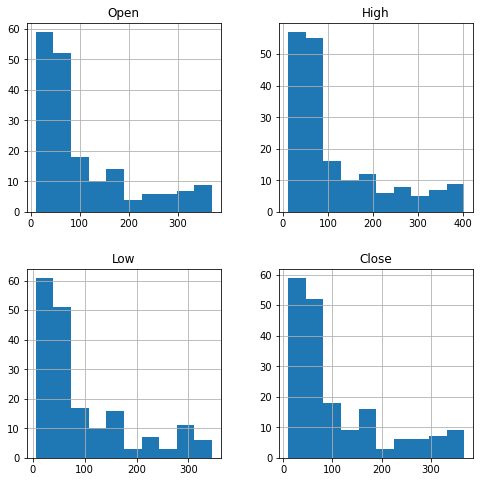

In [129]:
df.hist(figsize=(8,8))# to see the distribution of values
plt.show()

# **3.Data Manipulation**

## **3.1 Finding Null Values**




In [130]:
#To get the percentage of null values each column wise
nullvalues_percentage = df.isna().sum().sort_values(ascending= False)/len(df) 
nullvalues_percentage

Date     0.0
Open     0.0
High     0.0
Low      0.0
Close    0.0
dtype: float64

In [131]:
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


## **3.2 Handling outliers**

In [132]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [133]:
num_cols = df._get_numeric_data().columns
num_cols

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

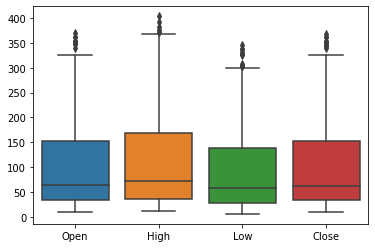

In [134]:
sns.boxplot(data=df)

# **4.EDA AND DATA VISUALIZATION**

## **4.1 Year-Wise Study Open and Close**

In [135]:
new_df=df.copy()

In [136]:
df['Date']

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object

In [137]:
new_df['Date'] = new_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [138]:
new_df.set_index('Date',inplace=True)

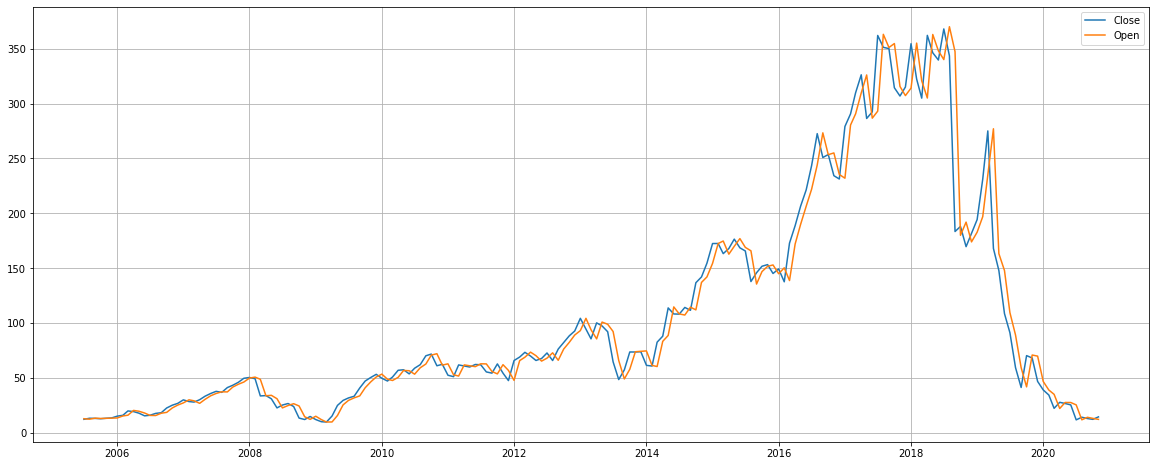

In [163]:
plt.figure(figsize=(20,8))
plt.plot(new_df['Close'])
plt.plot(new_df['Open'])
plt.legend(['Close','Open'])
plt.grid()

## **4.2 Year-Wise Study High and Low**

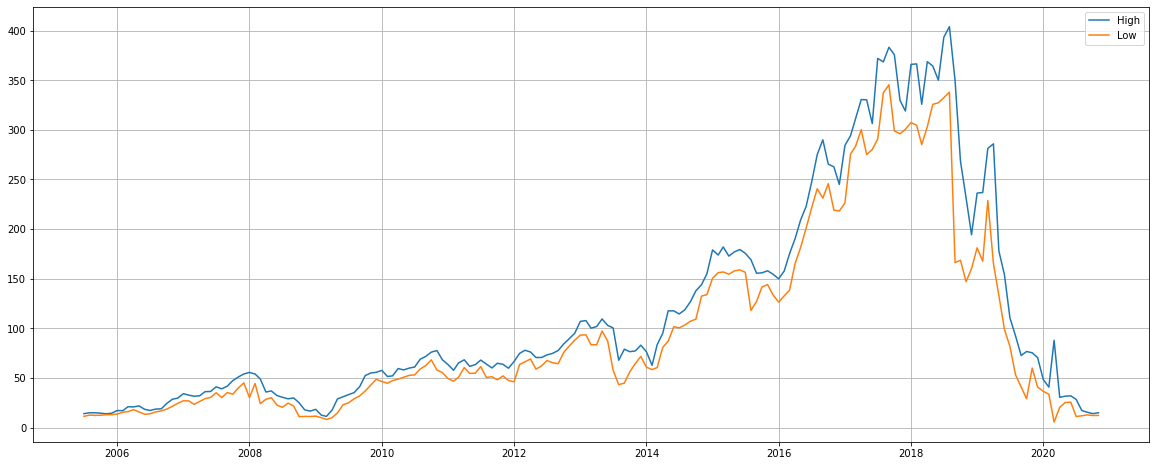

In [165]:
plt.figure(figsize=(20,8))
plt.plot(new_df['High'])
plt.plot(new_df['Low'])
plt.legend(['High','Low'])
plt.grid()

## **4.3 Data Distribution and mean and median of every variables independently**

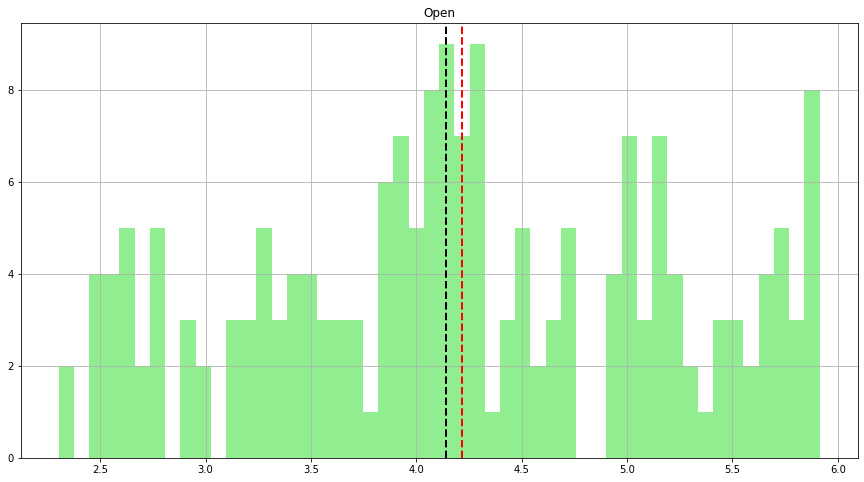

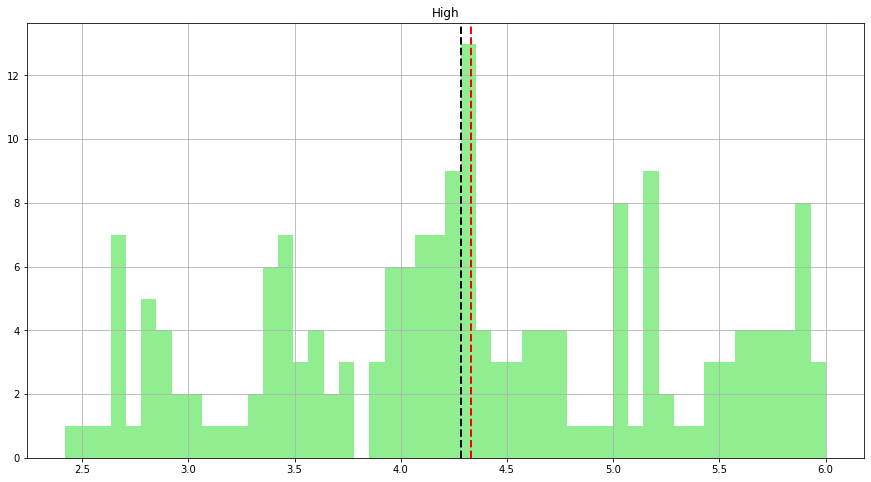

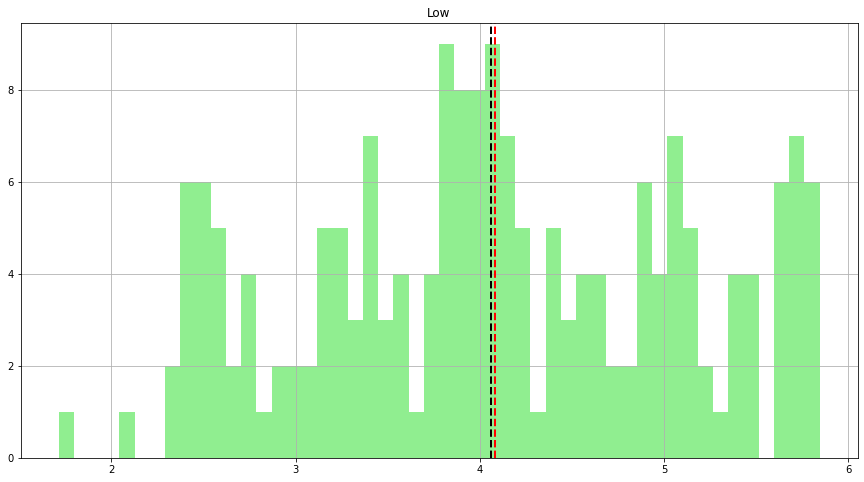

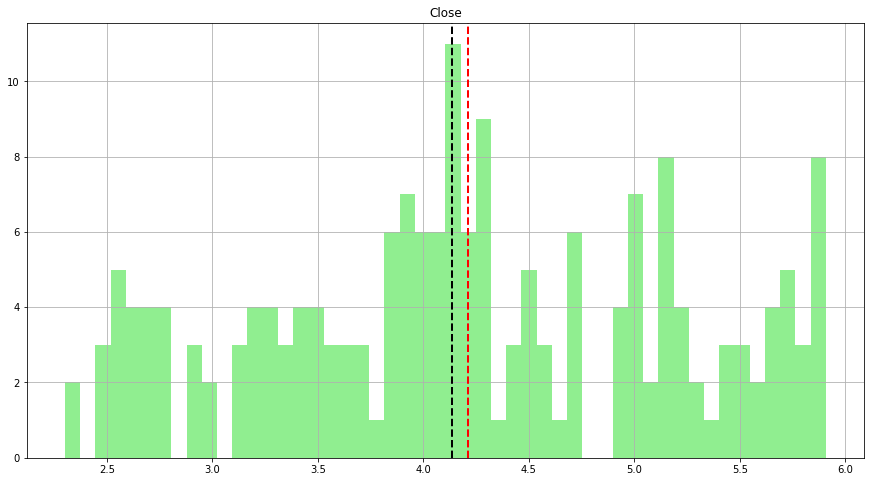

In [166]:
for col in num_cols[:]:
   # Defining the size of the graph
    fig = plt.figure(figsize=(15, 8))
    ax = fig.gca()
    # Normalizing the values using logarithamic function
    feature = np.log(df[col])
    # Defining the number of bins and colur of the graph
    feature.hist(bins=50, ax = ax,color="lightgreen")
    # Definig the mean properties
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    # Defining the median properties
    ax.axvline(feature.median(), color='black', linestyle='dashed', linewidth=2)  
    # Defining the title of the graph  
    ax.set_title(col)
# Displaying the graph    
plt.show()

In [167]:
#for i in num_cols[:]:
  #fig = plt.figure(figsize=(10,6))
  #ax = fig.gca()
  #features = new_df[i]
  #label = new_df['Close']
  #features.hist(bins = 50,ax = ax,color = 'cyan')
  #ax.axvline(features.mean(),color = 'blue',linestyle = 'dashdot',linewidth = 2)
  #ax.axvline(features.median(),color = 'magenta',linestyle = 'dashdot',linewidth = 2)
  #ax.set_title(i)

In [168]:
indep_var=df[['High','Low','Open']]
dep_var=df['Close']

## **4.4 Independent Variable Study**

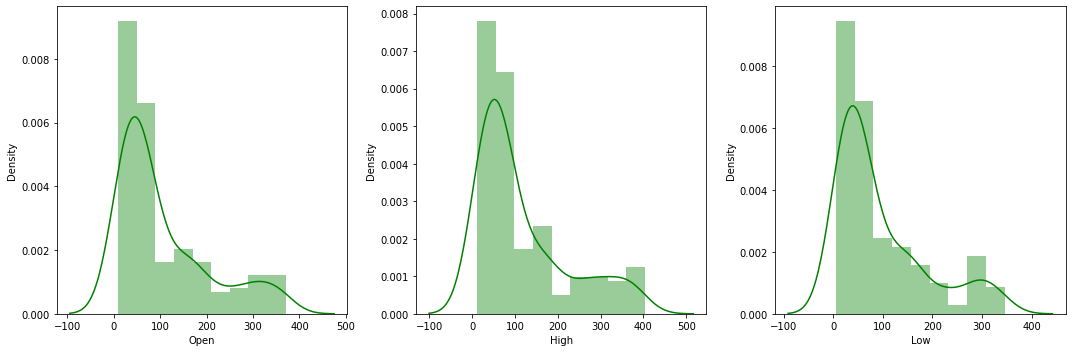

In [169]:
fig, axs = plt.subplots(ncols=3,figsize=(15,5))

#graph plot
sns.distplot(df['Open'], color='g', ax=axs[0])
sns.distplot(df['High'], color='g', ax=axs[1])
sns.distplot(df['Low'], color='g',ax=axs[2])

# this prevents plots from overlapping
plt.tight_layout()

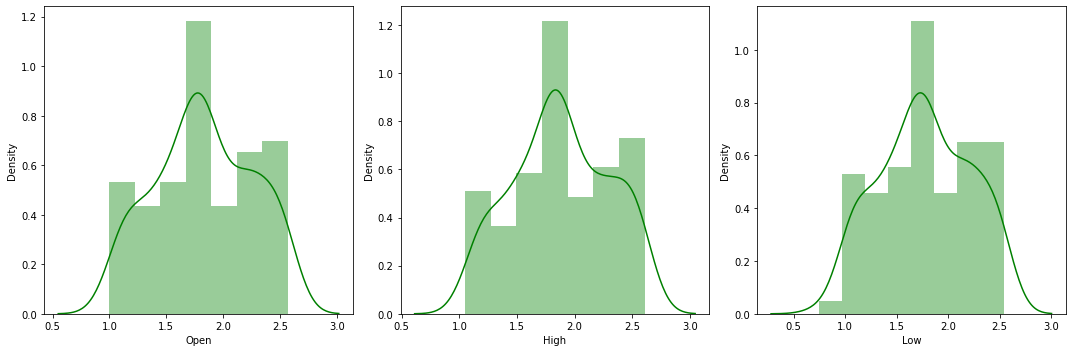

In [170]:
# subplots and figure size
fig, axs = plt.subplots(ncols=3,figsize=(15,5))

#graph plot
sns.distplot(np.log10(df['Open']), color='g', ax=axs[0])
sns.distplot(np.log10(df['High']), color='g', ax=axs[1])
sns.distplot(np.log10(df['Low']), color='g',ax=axs[2])

# this prevents plots from overlapping
plt.tight_layout()

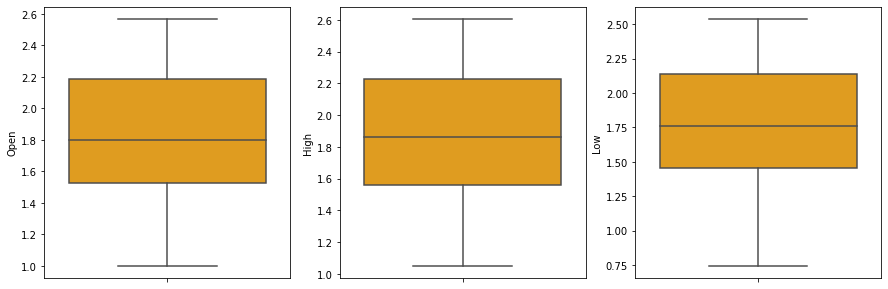

In [171]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig = sns.boxplot(y=np.log10(df["Open"]), color="orange",ax=axes[0])
fig = sns.boxplot(y=np.log10(df["High"]), color="orange",ax=axes[1])
fig = sns.boxplot(y=np.log10(df["Low"]), color="orange",ax=axes[2])

## **4.5 Dependent Variables Study and Normalization**

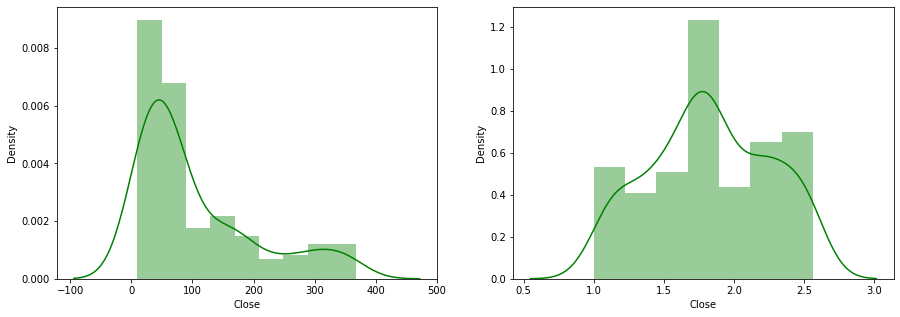

In [172]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
sns.distplot(df['Close'], color='g', ax=axs[0])
sns.distplot(np.log10(df['Close']), color='g', ax=axs[1])


## **4.6 Heatmap**

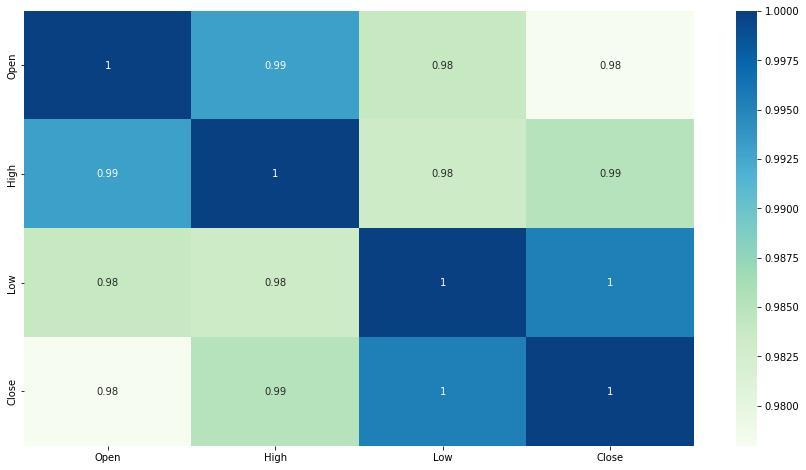

In [173]:
corr = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(abs(corr),annot = True,cmap = 'GnBu')

## **4.7 Co-relation between Independent and Dependent variables**

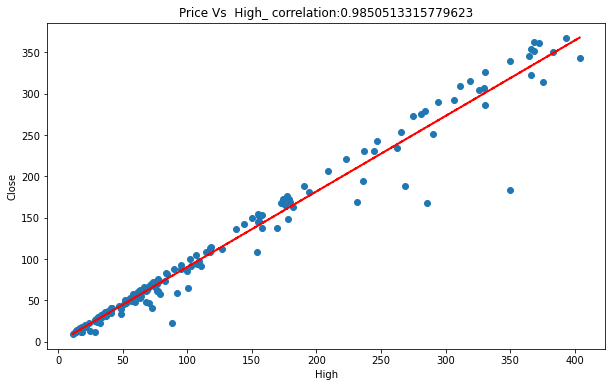

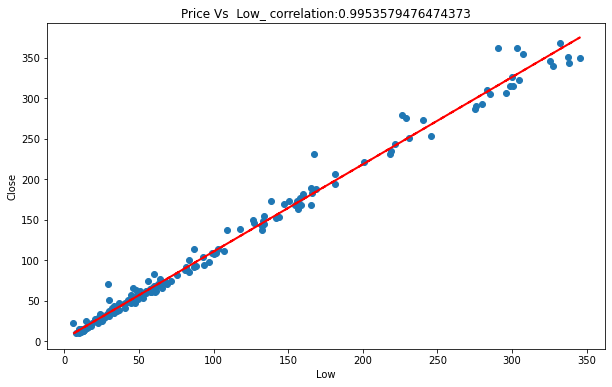

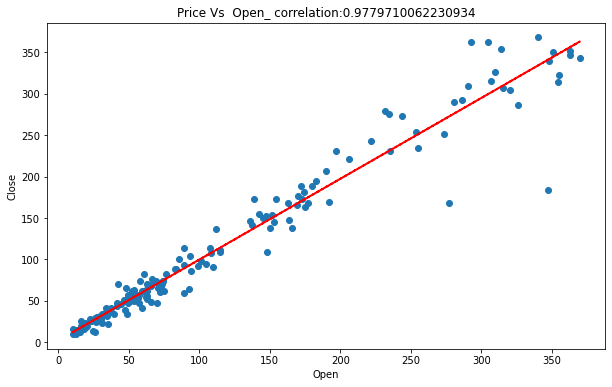

In [174]:
for col in indep_var[:-1]:
  fig = plt.figure(figsize = (10,6))
  ax = fig.gca()
  features = df[col]
  label = df['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title('Price Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(df[col],df['Close'],1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col] , y_hat, "r--",lw = 2)
plt.show()

# 5.**Multicollinearity using VIF analysis**

In [175]:
# Dealing with multicollinearity using VIF analysis.
# Calculating VIF(Variation Inflation Factor) to see the correlation between independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor  

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [176]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


# **6.Train/Test Model**

In [215]:
# Defining X to the normalized features except Date and Close
X = df.drop(columns=['Close','Date']).apply(zscore)

# Defining y to the normalized feature Close
y = np.log10(df['Close'])

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)



In [217]:
X_train[0:10]

,Open,High,Low
59,-0.495287,-0.530001,-0.465501
73,-0.432415,-0.491716,-0.488475
120,0.643516,0.560849,0.676052
145,2.610818,2.380253,2.664784
118,0.653657,0.573863,0.690892
17,-0.812692,-0.815161,-0.775485
5,-0.933468,-0.958684,-0.900797
130,0.854444,0.875996,0.948991
122,0.304917,0.371497,0.352328
91,-0.011473,-0.078309,-0.017014


# **7. Model training**

In [218]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 7.1 Linear Regression

In [219]:
reg = LinearRegression()
reg_model = reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.8146653424416905

In [220]:
reg.intercept_

1.450888534698787

In [221]:
reg.coef_

array([-0.16988184,  0.73317897,  0.86597216])

Prediction

In [223]:
y_pred = reg.predict(X_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

Evaluation Metric

In [224]:
MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)
MAE = mean_absolute_error((y_test), (y_pred))
print("MAE :", MAE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
R2 = r2_score((y_test), (y_pred))
print("R2 :" ,R2)
Adjusted_R2 = 1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.03158251893048737
MAE : 0.15128511034606276
RMSE : 0.17771471219481907
R2 : 0.8225699915389755
Adjusted R2 :  0.8064399907697914


In [226]:
#empty data frame creation for evaluation metrics for each regression model into this data frame to compare at the end.
i=0
metric_df=pd.DataFrame()
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Linear regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i+=1

**Visualization**

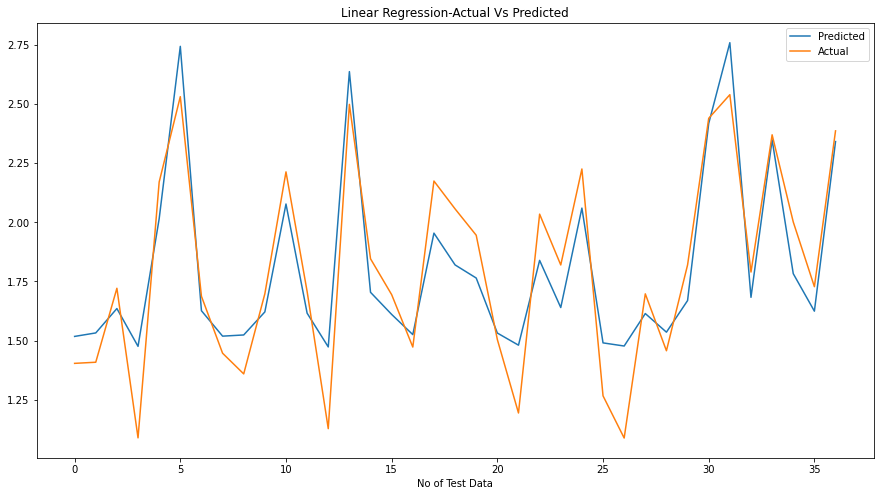

In [227]:
#actual-predicted values plot
plt.figure(figsize=(15,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.title('Linear Regression-Actual Vs Predicted')
plt.legend(["Predicted","Actual"],loc = 'upper right')
plt.xlabel('No of Test Data')
plt.show()

## 7.2 Ridge Regression

In [229]:
#fitting data
ridge  = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [230]:
ridge.score(X_train, y_train)

0.8146472953410059

In [231]:
ridge.score(X_test, y_test)

0.8219970013503927

**Prediction**

In [232]:
# Predicting using the Testing Features
y_ridge_pred = ridge.predict(X_test)

**Evaluation**

In [ ]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_ridge_pred))
print("MSE :" , MSE)
MAE = mean_absolute_error((y_test), (y_ridge_pred))
print("MAE :", MAE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
R2 = r2_score((y_test), (y_ridge_pred))
print("R2 :" ,R2)
Adjusted_R2 = 1-(1-r2_score((y_test), (y_ridge_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

**Cross Validation and Hyperparameter Tuning**

In [233]:
# Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [234]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.035287698578709864


In [235]:
#training the data with alpha=1
ridge  = Ridge(alpha=1)
ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [236]:
ridge.score(X_train, y_train)

0.8114557966496079

In [237]:
ridge.score(X_test, y_test)

0.8164107352000802

In [238]:
#Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

**Evaluation after Cross Validation**

In [239]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_ridge_pred))
print("MSE :" , MSE)
MAE = mean_absolute_error((y_test), (y_ridge_pred))
print("MAE :", MAE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
R2 = r2_score((y_test), (y_ridge_pred))
print("R2 :" ,R2)
Adjusted_R2 = 1-(1-r2_score((y_test), (y_ridge_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.031684511111149824
MAE : 0.1514771724208589
RMSE : 0.17800143569968704
R2 : 0.8219970013503927
Adjusted R2 :  0.8058149105640647


In [240]:
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Ridge regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i=i+1

**Visualisation**

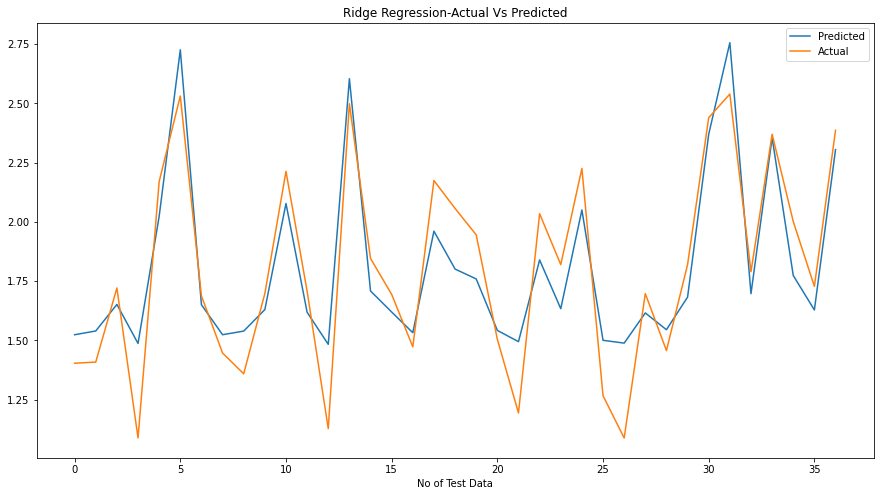

In [241]:
#actual-predicted values plot
plt.figure(figsize=(15,8))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.title('Ridge Regression-Actual Vs Predicted')
plt.legend(["Predicted","Actual"],loc = 'upper right')
plt.xlabel('No of Test Data')
plt.show()

## 7.3 Lasso Regression

In [242]:
#fitting data
lasso  = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [243]:
lasso.score(X_train, y_train)

0.8144277125572799

In [244]:
lasso.score(X_test,y_test)

0.8202319157392468

**Prediction**

In [245]:
# Predicting using the Testing Features
y_lasso_pred = lasso.predict(X_test)

**Evaluation**

In [246]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_lasso_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_lasso_pred))
print("R2 :" ,R2)

Adjusted_R2 =1-(1-r2_score((y_test), (y_lasso_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.03199869612535045
RMSE : 0.17888179372242008
R2 : 0.8202319157392468
Adjusted R2 :  0.8038893626246328


**Cross Validation and Hyperparameter Tuning**

In [247]:
# Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [248]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -0.03518750967998802


In [249]:
#fitting data
lasso  = Lasso(alpha=0.0014)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0014)

In [250]:
lasso.score(X_train, y_train)

0.8143542093236373

In [251]:
lasso.score(X_test,y_test)

0.8200013505995645

In [252]:
# Predicting using the Testing Features
y_lasso_pred = lasso.predict(X_test)

**Evaluation after Cross Validation**

In [253]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_lasso_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_lasso_pred))
print("R2 :" ,R2)

Adjusted_R2 =1-(1-r2_score((y_test), (y_lasso_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.032039736690877604
RMSE : 0.17899647116878478
R2 : 0.8200013505995645
Adjusted R2 :  0.8036378370177067


In [254]:
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Ridge regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i=i+1

**Visualisation**

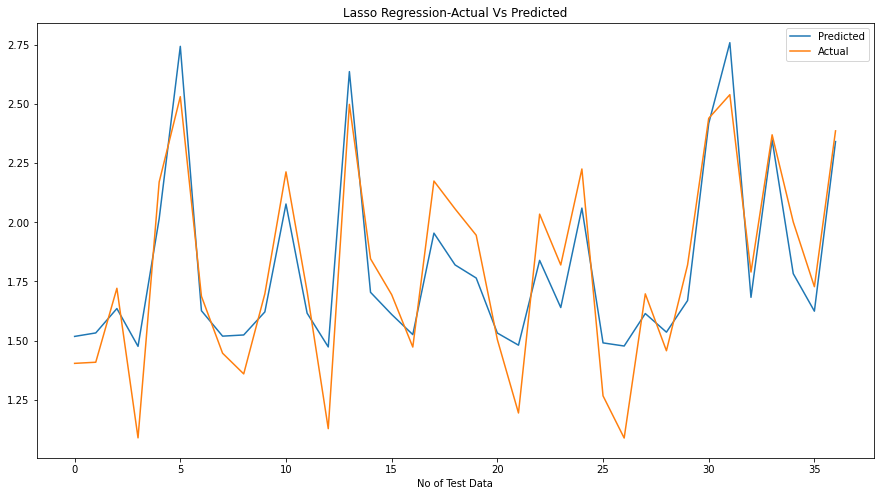

In [255]:
#actual-predicted values plot
plt.figure(figsize=(15,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.title('Lasso Regression-Actual Vs Predicted')
plt.legend(["Predicted","Actual"],loc = 'upper right')
plt.xlabel('No of Test Data')
plt.show()

## 7.4 Elastic Net regression

In [256]:
elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [261]:
elastic.score(X_train, y_train)

0.5418204159491762

In [262]:
elastic.score(X_test,y_test)

0.5309002349934002

**Prediction**

In [263]:
# Predicting using the Testing independent features
y_elastic_pred = elastic.predict(X_test)

**Evaluation**

In [265]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_elastic_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_elastic_pred))
print("R2 :" ,R2)

Adjusted_R2 =1-(1-r2_score((y_test), (y_elastic_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.08349969848455795
RMSE : 0.2889631438169199
R2 : 0.5309002349934002
Adjusted R2 :  0.48825480181098213


**Cross Validation and Hyper parameter Tuning**

In [266]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=3)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [267]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.8}

Using  {'alpha': 0.001, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.035263119200658534


In [269]:
#Applying Elastic net to the training dataset with alpha = 0.001 and l1 ratio = 0.8
elastic = ElasticNet(alpha=0.001,l1_ratio=0.8)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.001, l1_ratio=0.8)

In [270]:
# Predicting using the Testing independent features
y_elastic_pred = elastic.predict(X_test)

In [271]:
elastic.score(X_train, y_train)

0.8144296303988935

In [272]:
elastic.score(X_test, y_test)

0.8204679206585326

In [273]:
# Predicting using the Testing Features
y_elastic_pred = elastic.predict(X_test)

In [274]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_elastic_pred))
print("MSE :" , MSE)
MAE = mean_absolute_error((y_test), (y_elastic_pred))
print("MAE :", MAE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
R2 = r2_score((y_test), (y_elastic_pred))
print("R2 :" ,R2)
Adjusted_R2 =1-(1-r2_score((y_test), (y_elastic_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.03195668727974603
MAE : 0.15209455795880464
RMSE : 0.17876433447347945
R2 : 0.8204679206585326
Adjusted R2 :  0.804146822536581


In [275]:
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Elastic Net regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"MAE"]= MAE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i=i+1

**Visualization**

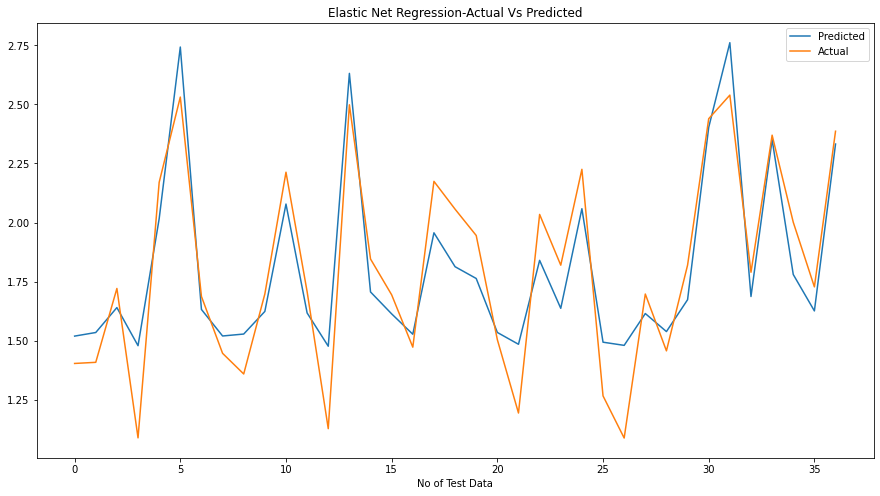

In [276]:
#actual-predicted values plot
plt.figure(figsize=(15,8))
plt.plot(y_elastic_pred)
plt.plot(np.array(y_test))
plt.title('Elastic Net Regression-Actual Vs Predicted')
plt.legend(["Predicted","Actual"],loc = 'upper right')
plt.xlabel('No of Test Data')
plt.show()

##**7.5 XgBoost Regressor**

In [277]:
#fitting data
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

[16:00:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [278]:
xgb.score(X_train, y_train)

0.9989856158912769

In [279]:
xgb.score(X_test, y_test)

0.9912879273828493

**Prediction**

In [280]:
# Predicting using the Testing Features
y_xgb_pred = xgb.predict(X_test)

**Evaluation Metric**

In [281]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_xgb_pred))
print("MSE :" , MSE)
MAE = mean_absolute_error((y_test), (y_xgb_pred))
print("MAE :", MAE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
R2 = r2_score((y_test), (y_xgb_pred))
print("R2 :" ,R2)
Adjusted_R2 =1-(1-r2_score((y_test), (y_xgb_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.0015507478173591147
MAE : 0.030345465994578463
RMSE : 0.03937953551477105
R2 : 0.9912879273828493
Adjusted R2 :  0.9904959207812901


In [282]:
#Inserting errors in dataframe
metric_df.loc[i,"Model_Name"]='XGBoost regressor'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"MAE"]= MAE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i=i+1

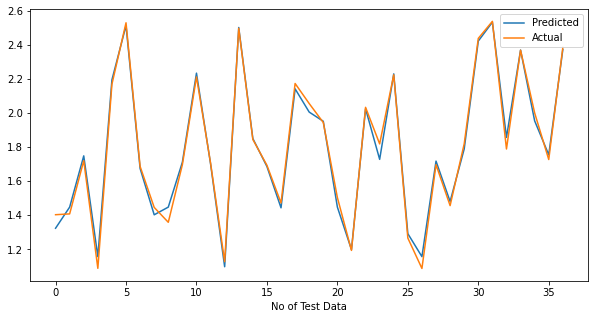

In [283]:
plt.figure(figsize=(10,5))
plt.plot(y_xgb_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"],loc = 'upper right')
plt.xlabel('No of Test Data')
plt.show()

# **8. Matric Comparision**

In [284]:
#sorting metrics
metric_df.sort_values(by=['MSE'],ascending=True,inplace=True)

In [285]:
metric_df

,Model_Name,MSE,RMSE,R2,Adjusted R2,MAE
4,XGBoost regressor,0.001551,0.039380,0.991288,0.990496,0.030345
0,Linear regression,0.031583,0.177715,0.822570,0.806440,NaN
1,Ridge regression,0.031685,0.178001,0.821997,0.805815,NaN
3,Elastic Net regression,0.031957,0.178764,0.820468,0.804147,0.152095
2,Ridge regression,0.032040,0.178996,0.820001,0.803638,NaN
